# Multiple Logistic Regression

**Contexto:**
La principal causa de muerte en el mundo desarrollado es la enfermedad cardíaca. Por lo tanto, es necesario trabajar para ayudar a prevenir los riesgos de sufrir un ataque cardíaco o un derrame cerebral.
Contenido: utilice este conjunto de datos para predecir qué pacientes tienen más probabilidades de sufrir una enfermedad cardíaca en un futuro próximo utilizando las funciones proporcionadas.
Reconocimiento: estos datos provienen del repositorio de aprendizaje automático de la Universidad de California en Irvine en: https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Peter Turney), consulte la carpeta "Costos

Attribute Information:
Only 14 attributes used:

- (age) edad en años

- (sex)	sexo (1 = masculino; 0 = femenino)

- (cp)	tipo de dolor en el pecho
				- Valor 1: angina típica
				- Valor 2: angina atípica
				- Valor 3: dolor no anginoso
				- Valor 4: asintomático
        
- (trestbps)	presión arterial en reposo (en mm Hg al ingreso en el hospital)

- (chol)	colesterol sérico en mg / dl

- (fbs)	azúcar en sangre en ayunas> 120 mg / dl (1 = verdadero; 0 = falso)

- (EKG)	resultados electrocardiográficos en reposo
			- Valor 0: normal
			- Valor 1: tener anomalía de la onda ST-T (inversiones de la onda T y / o elevación o depresión del ST> 0,05 mV)
			- Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes

- (thalach)	 máxima alcanzada

- (oldpeak)	del ST inducida por el ejercicio en relación con el reposo

- (slope)	pendiente: la pendiente del segmento ST de ejercicio pico
			- Valor 1: pendiente ascendente
			- Valor 2: plano
			- Valor 3: descendente

- (ca)		número de vasos principales (0-3) coloreados por la floración

- (thal)		3 = normal; 6 = defecto fijo; 7 = defecto reversible

- (Heart_Disease) 	diagnóstico de enfermedad cardíaca(estado de enfermedad angiográfica)
		- Valor 0: <50% de estrechamiento del diámetro
		- Valor 1:> 50% de estrechamiento del diámetro
	(en cualquier buque importante: los atributos 59 a 68 son recipientes)

## Importing the libraries

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [146]:
datos = pd.read_csv("Heart_Disease_Prediction.csv", sep=";")
datos

,Age,Sex,cp,trestbps,Chol,fbs,EKG,thalach,exang,oldpeak,Slope,ca,Thal,Heart_Disease
0,70,masculino,asintomatico,130,322,FALSO,hipertrofia,109,no,2.4,plano,3,normal,Presence
1,67,femenino,dolor_no_anginoso,115,564,FALSO,hipertrofia,160,no,1.6,plano,0,defecto_reversible,Absence
2,57,masculino,angina_atipica,124,261,FALSO,normal,141,no,0.3,ascendente,0,defecto_reversible,Presence
3,64,masculino,asintomatico,128,263,FALSO,normal,105,si,0.2,plano,1,defecto_reversible,Absence
4,74,femenino,angina_atipica,120,269,FALSO,hipertrofia,121,si,0.2,ascendente,1,normal,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,masculino,dolor_no_anginoso,172,199,VERDADERO,normal,162,no,0.5,ascendente,0,defecto_reversible,Absence
266,44,masculino,angina_atipica,120,263,FALSO,normal,173,no,0.0,ascendente,0,defecto_reversible,Absence
267,56,femenino,angina_atipica,140,294,FALSO,hipertrofia,153,no,1.3,plano,0,normal,Absence
268,57,masculino,asintomatico,140,192,FALSO,normal,148,no,0.4,plano,0,defecto,Absence


In [147]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            270 non-null    int64  
 1   Sex            270 non-null    object 
 2   cp             270 non-null    object 
 3   trestbps       270 non-null    int64  
 4   Chol           270 non-null    int64  
 5   fbs            270 non-null    object 
 6   EKG            270 non-null    object 
 7   thalach        270 non-null    int64  
 8   exang          270 non-null    object 
 9   oldpeak        270 non-null    float64
 10  Slope          270 non-null    object 
 11  ca             270 non-null    int64  
 12  Thal           270 non-null    object 
 13  Heart_Disease  270 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 29.7+ KB


In [148]:
# cambiar formato de int a objet
# df['age'] = df['age'].astype('object')

In [149]:
datos.describe()

,Age,trestbps,Chol,thalach,oldpeak,ca
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000


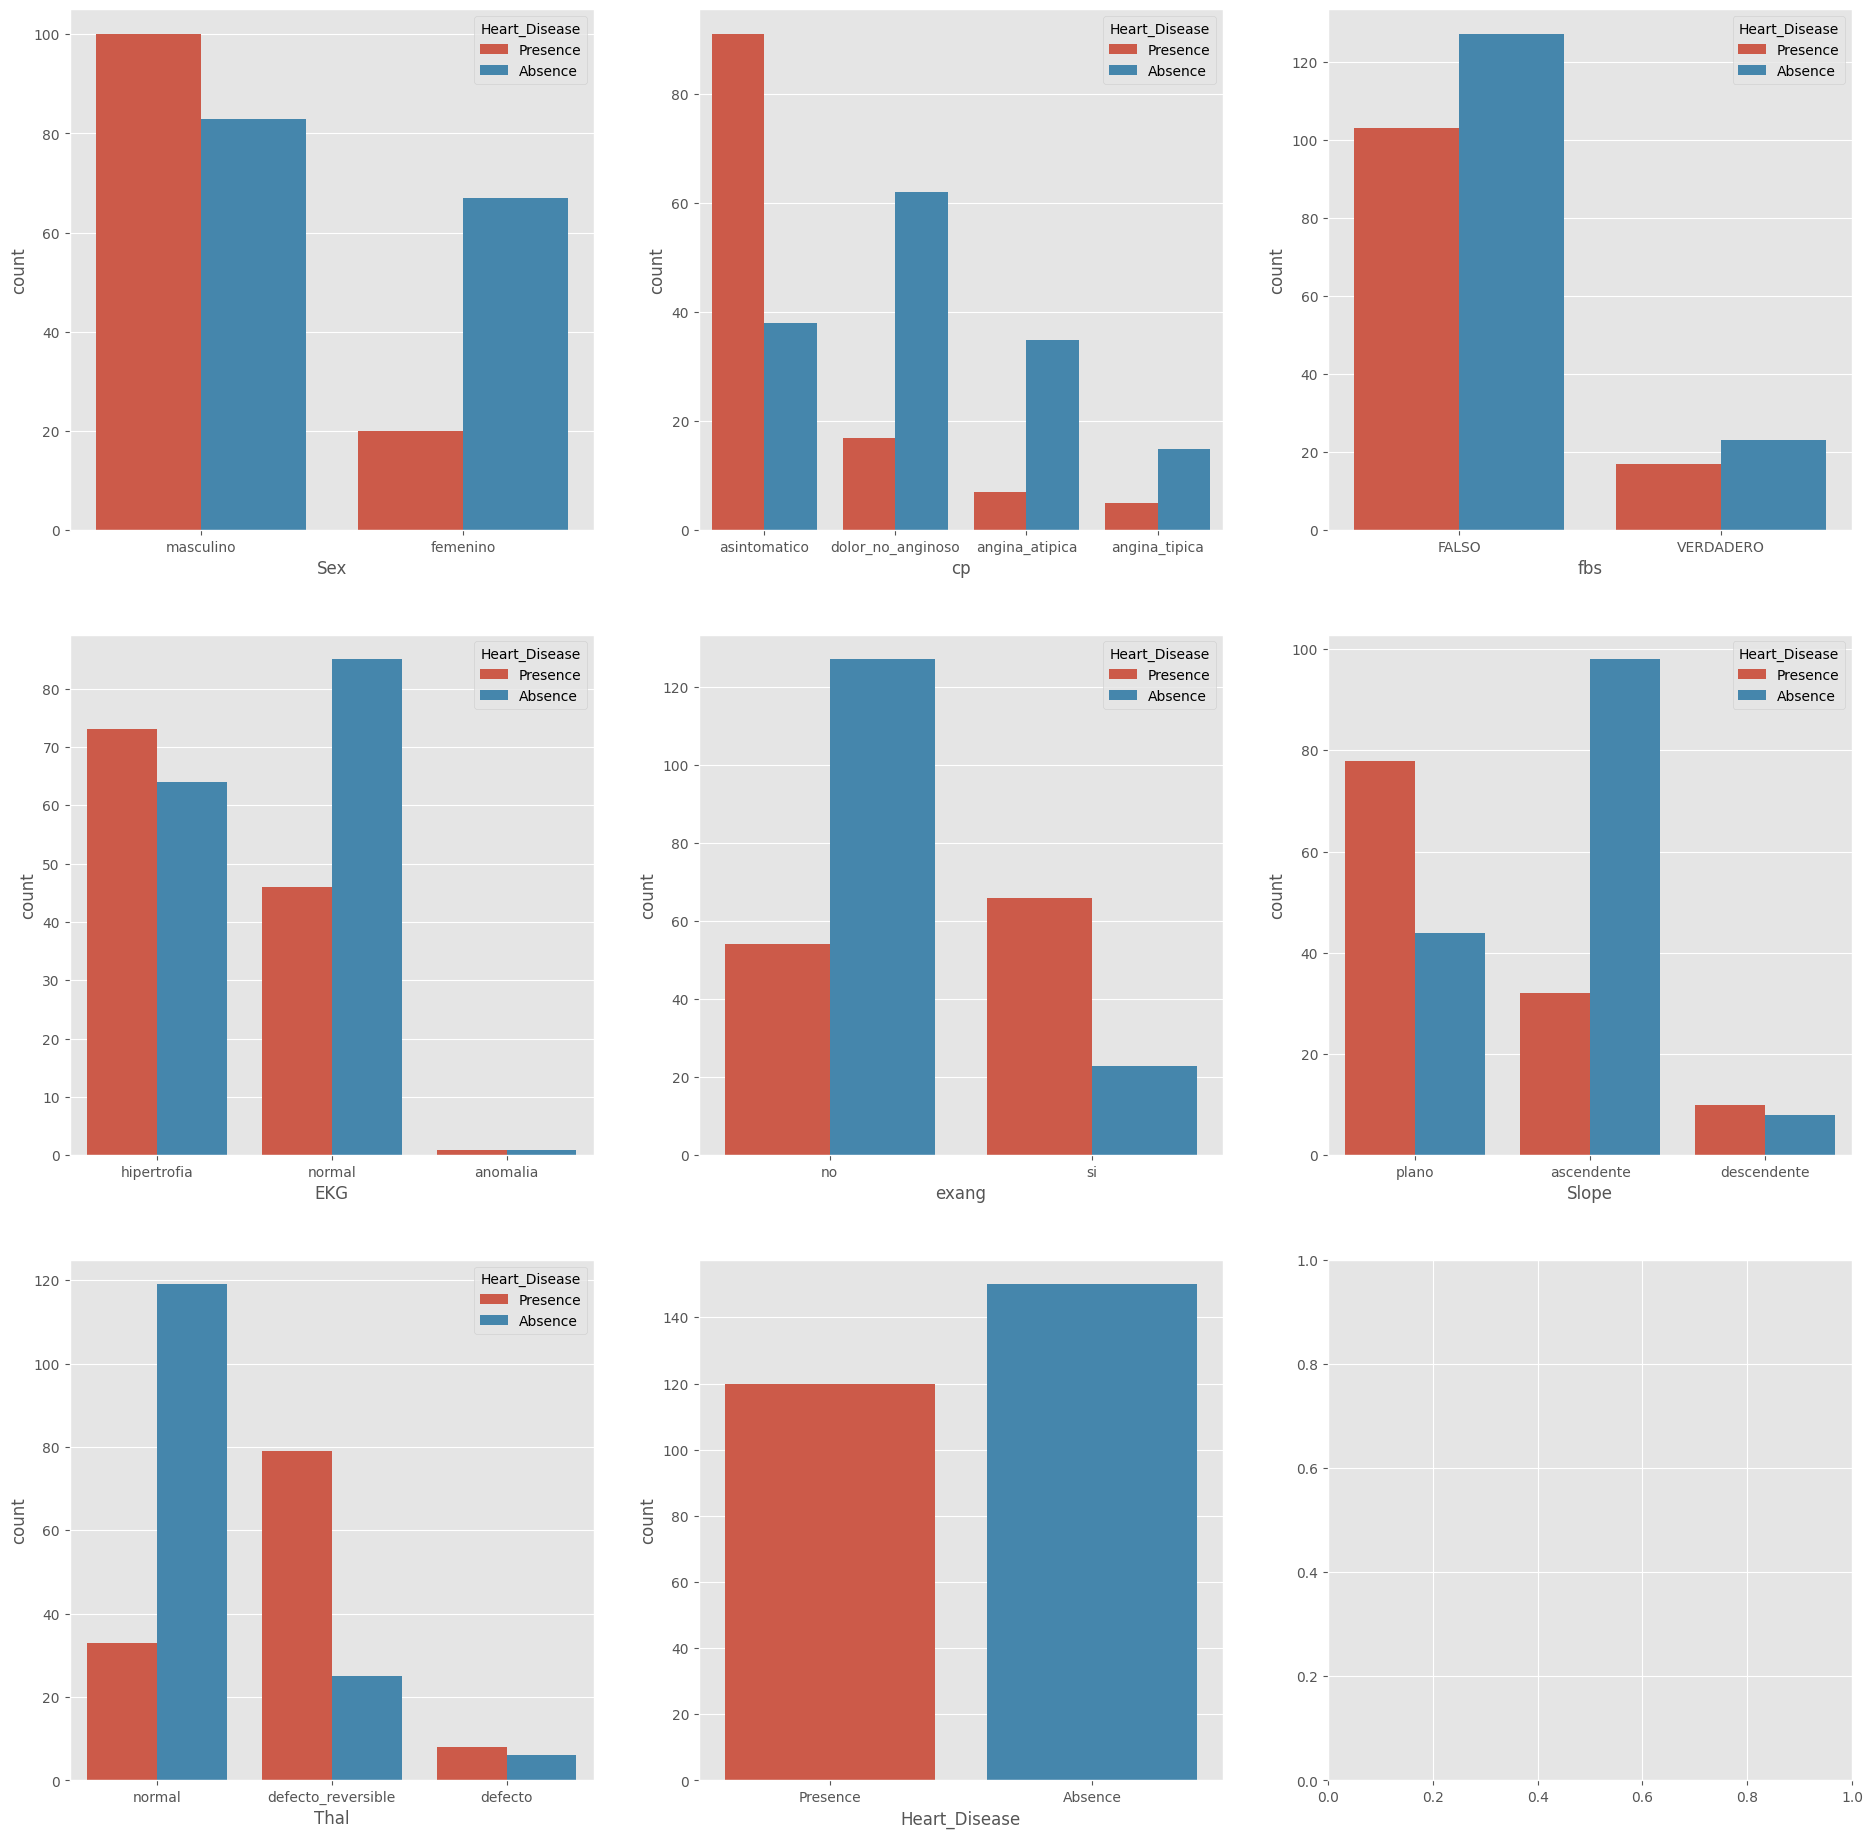

In [150]:
# Analisis exploratorio

columns_cat = datos.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(23, 23))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=datos, x=var,hue='Heart_Disease', ax=ax)

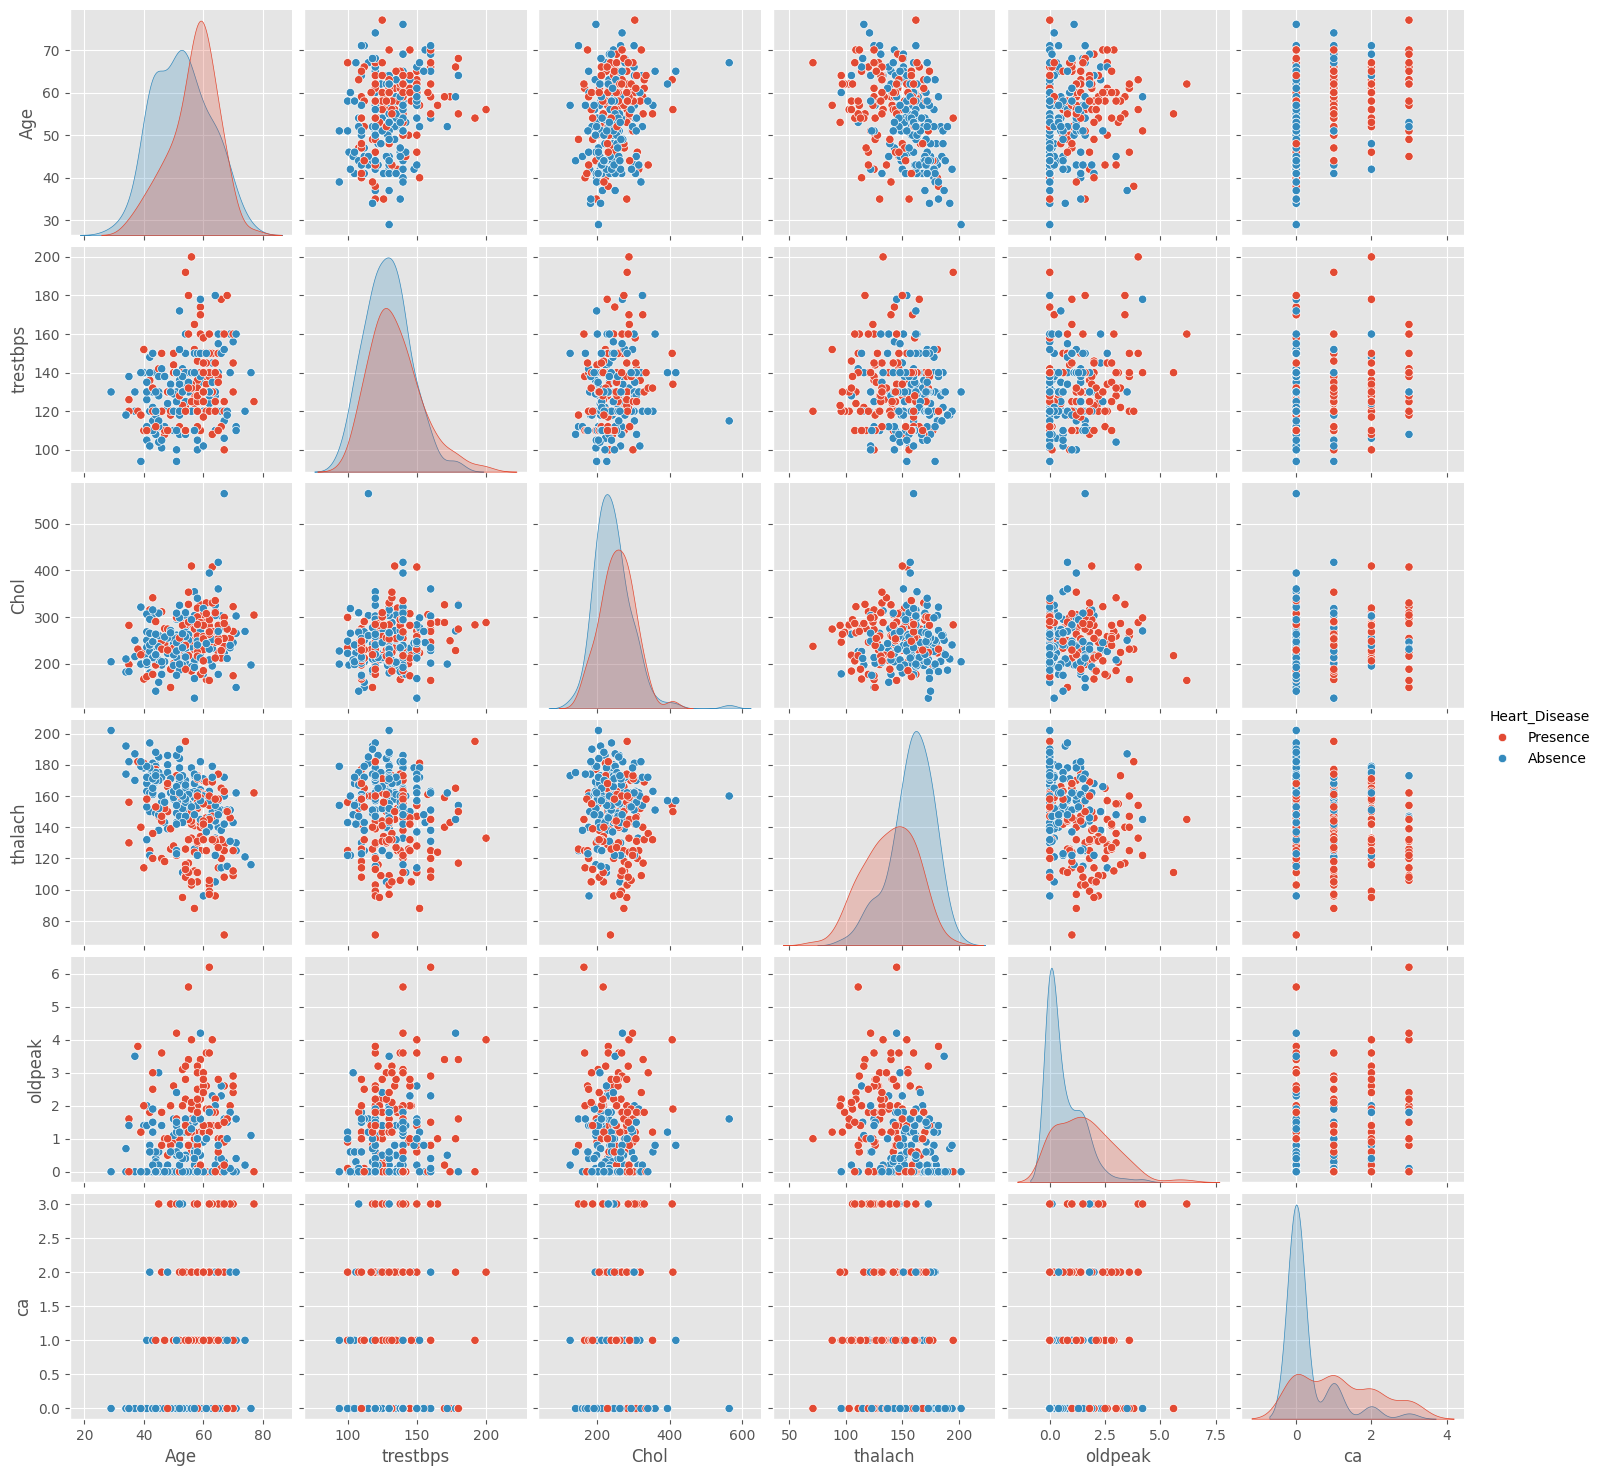

In [151]:
sns.pairplot(data=datos, hue='Heart_Disease')

recodificando y conviertiendo a numerico la variable objetivo "Heart Disease"

In [152]:
datos.Heart_Disease.replace(to_replace=['Presence','Absence'], value=[1,0], inplace=True)

In [153]:
datos['Heart_Disease'] = datos['Heart_Disease'].astype('int')
datos.dtypes

,0
Age,int64
Sex,object
cp,object
trestbps,int64
Chol,int64
fbs,object
EKG,object
thalach,int64
exang,object
oldpeak,float64


numero de observaciones de la variable respuesta Heart Disease

In [154]:
print("Número de observaciones por clase")
print(datos['Heart_Disease'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * datos['Heart_Disease'].value_counts(normalize=True))

Número de observaciones por clase
Heart_Disease
0    150
1    120
Name: count, dtype: int64

Porcentaje de observaciones por clase
Heart_Disease
0    55.555556
1    44.444444
Name: proportion, dtype: float64


observamos un 56% frente a 44% no necesitamos balancear datos

In [155]:
# creamos una nueva data
df_processing = datos.copy()

In [156]:
# Manejo de variables cualitativas (categoricas)
df_processing = pd.get_dummies(datos)
df_processing.head(10)

,Age,trestbps,Chol,thalach,oldpeak,ca,Heart_Disease,Sex_femenino,Sex_masculino,cp_angina_atipica,...,EKG_hipertrofia,EKG_normal,exang_no,exang_si,Slope_ascendente,Slope_descendente,Slope_plano,Thal_defecto,Thal_defecto_reversible,Thal_normal
0,70,130,322,109,2.4,3,1,False,True,False,...,True,False,True,False,False,False,True,False,False,True
1,67,115,564,160,1.6,0,0,True,False,False,...,True,False,True,False,False,False,True,False,True,False
2,57,124,261,141,0.3,0,1,False,True,True,...,False,True,True,False,True,False,False,False,True,False
3,64,128,263,105,0.2,1,0,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,74,120,269,121,0.2,1,0,True,False,True,...,True,False,False,True,True,False,False,False,False,True
5,65,120,177,140,0.4,0,0,False,True,False,...,False,True,True,False,True,False,False,False,True,False
6,56,130,256,142,0.6,1,1,False,True,False,...,True,False,False,True,False,False,True,True,False,False
7,59,110,239,142,1.2,1,1,False,True,False,...,True,False,False,True,False,False,True,False,True,False
8,60,140,293,170,1.2,2,1,False,True,False,...,True,False,True,False,False,False,True,False,True,False
9,63,150,407,154,4.0,3,1,True,False,False,...,True,False,True,False,False,False,True,False,True,False


<Axes: xlabel='Heart_Disease', ylabel='index'>

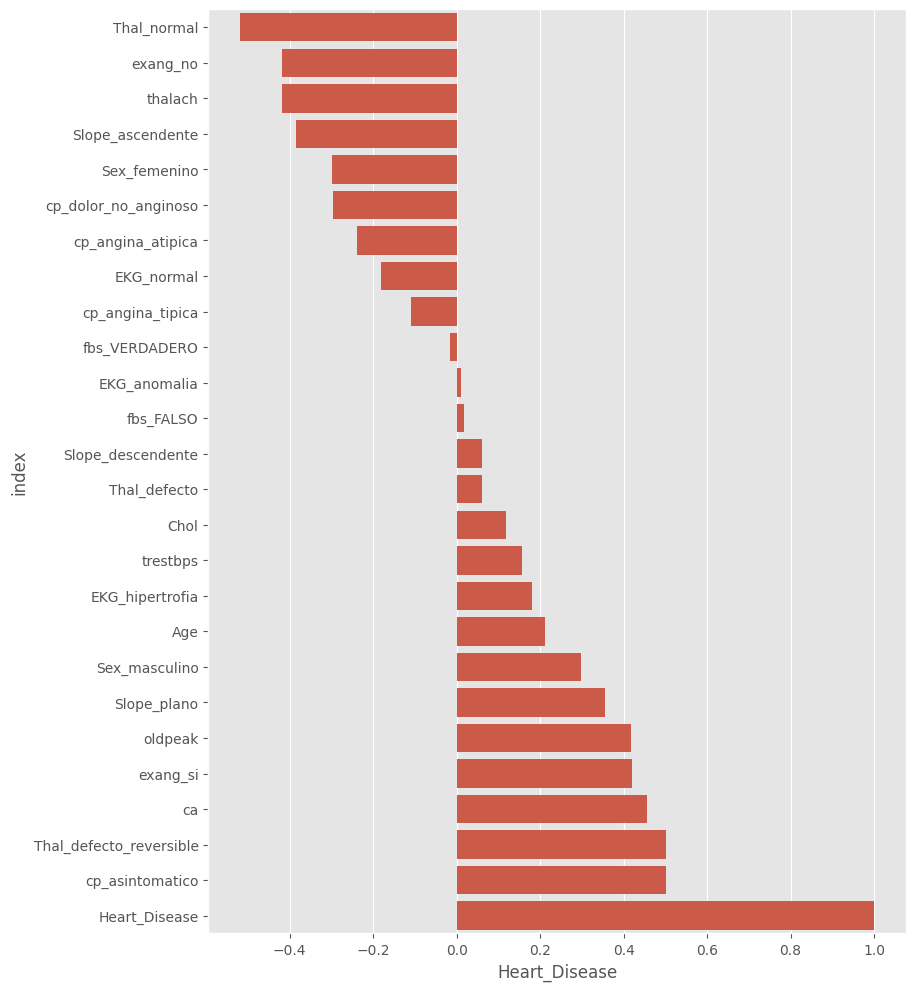

In [157]:
plt.figure(figsize=(9,12))
corr = df_processing.corr()['Heart_Disease'].sort_values(ascending=True).reset_index()[0:45]
sns.barplot(data=corr, x='Heart_Disease',y='index')

Heart Disease esta relacionado fuertemente en forma positiva con Thal_normal, luego con exang_no y asi sucesivamente y correlacionado negativamente con las variables del lado derecho.

**Escalabilidad de datos.**

Escalaremos los datos debido a las diferencias de pesos entre las variables, como la edad, el pago mensual y el pago anual, para que no influyan más las variables con valores más grandes y las más pequeñas sean ignoradas.

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_processing_scaled = scaler.fit_transform(df_processing)
df_processing_scaled

array([[0.85416667, 0.33962264, 0.44748858, ..., 0.        , 0.        ,
        1.        ],
       [0.79166667, 0.19811321, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.58333333, 0.28301887, 0.30821918, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.5625    , 0.43396226, 0.38356164, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 0.43396226, 0.15068493, ..., 1.        , 0.        ,
        0.        ],
       [0.79166667, 0.62264151, 0.3652968 , ..., 0.        , 0.        ,
        1.        ]])

In [159]:
df_processing_scaled = pd.DataFrame(df_processing_scaled)
df_processing_scaled.columns = df_processing.columns
df_processing_scaled

,Age,trestbps,Chol,thalach,oldpeak,ca,Heart_Disease,Sex_femenino,Sex_masculino,cp_angina_atipica,...,EKG_hipertrofia,EKG_normal,exang_no,exang_si,Slope_ascendente,Slope_descendente,Slope_plano,Thal_defecto,Thal_defecto_reversible,Thal_normal
0,0.854167,0.339623,0.447489,0.290076,0.387097,1.000000,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.791667,0.198113,1.000000,0.679389,0.258065,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.583333,0.283019,0.308219,0.534351,0.048387,0.000000,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.729167,0.320755,0.312785,0.259542,0.032258,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.937500,0.245283,0.326484,0.381679,0.032258,0.333333,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,0.735849,0.166667,0.694656,0.080645,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
266,0.312500,0.245283,0.312785,0.778626,0.000000,0.000000,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
267,0.562500,0.433962,0.383562,0.625954,0.209677,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
268,0.583333,0.433962,0.150685,0.587786,0.064516,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [160]:
from sklearn.model_selection import train_test_split
X = df_processing.drop(columns = 'Heart_Disease')
y = df_processing['Heart_Disease']

## Splitting the dataset into the Training set and Test set

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 34,
                                        shuffle      = True
                                    )

In [162]:
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

X_train:(216, 25)
X_test:(54, 25)

y_train:(216, 1)
y_test:(54, 1)


## Training the Logistic Regression model on the Training set

In [163]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(random_state = 0)
result= modelo.fit(X_train, y_train)

In [164]:
# accuracy del entrenamiento
print("Intercepto del modelo:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

Intercepto del modelo: [-0.01523994]
Coeficiente: [('Age', -0.03353061602716903), ('trestbps', 0.02056613982478268), ('Chol', 0.00995216414735314), ('thalach', -0.040004469310053394), ('oldpeak', 0.5536627953001766), ('ca', 1.149313003621921), ('Sex_femenino', -0.8482863728629721), ('Sex_masculino', 0.8264098798846871), ('cp_angina_atipica', -0.3279139291716453), ('cp_angina_tipica', -0.6615906979561053), ('cp_asintomatico', 1.1972310208347987), ('cp_dolor_no_anginoso', -0.2296028866863727), ('fbs_FALSO', 0.3005200552175553), ('fbs_VERDADERO', -0.3223965481970443), ('EKG_anomalia', 0.010843150911066936), ('EKG_hipertrofia', 0.11504957387643827), ('EKG_normal', -0.14776921776710278), ('exang_no', -0.3984219172313285), ('exang_si', 0.3765454242523846), ('Slope_ascendente', -0.4080671809786453), ('Slope_descendente', -0.3526454844156259), ('Slope_plano', 0.7388361724151888), ('Thal_defecto', -0.23965684246422822), ('Thal_defecto_reversible', 0.5543865504549893), ('Thal_normal', -0.3366062

In [165]:
y_pred = modelo.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [166]:
from sklearn import metrics
y_pred = modelo.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7222222222222222


In [167]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[22,  4],
       [11, 17]])

<Axes: title={'center': 'Los 10 factores principales que retienen'}>

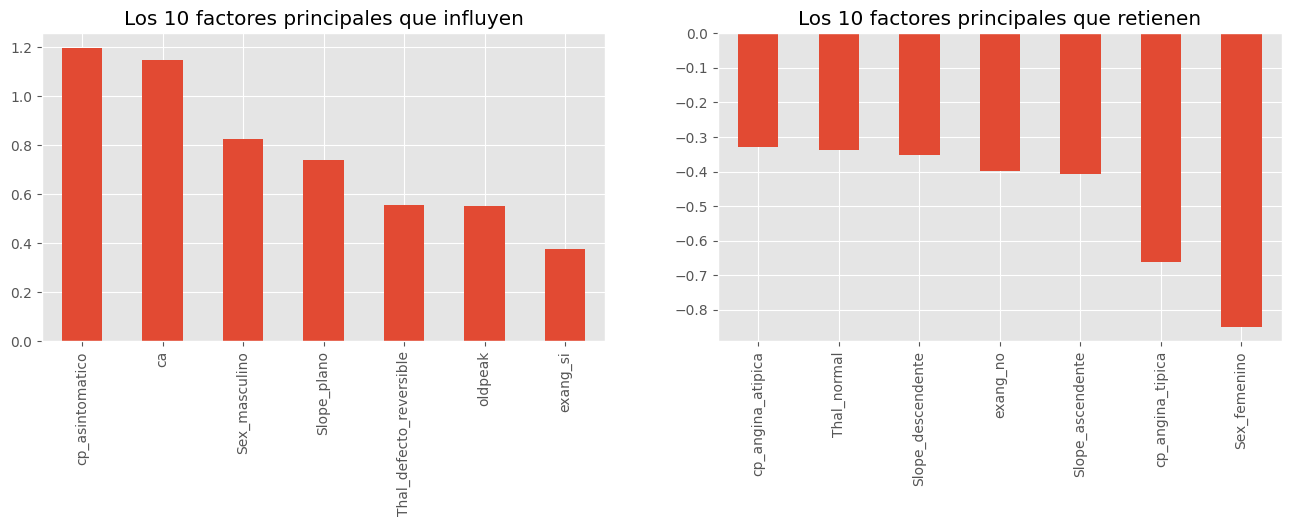

In [168]:
weights = pd.Series(modelo.coef_[0], index=X.columns.values)

fig,axs = plt.subplots(1,2,figsize=(16,4))

weights.sort_values(ascending=False).head(7).plot(kind='bar',ax=axs[0],title='Los 10 factores principales que influyen')
weights.sort_values(ascending=False).tail(7).plot(kind='bar',ax=axs[1],title='Los 10 factores principales que retienen')

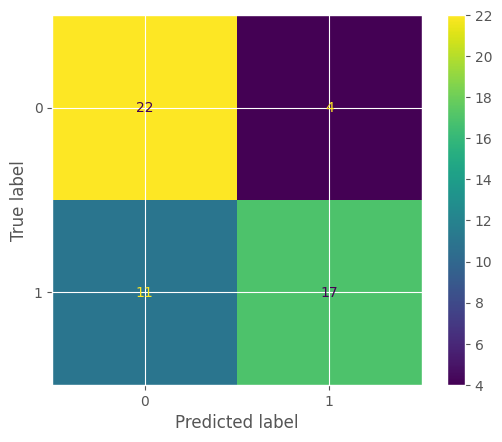

In [169]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred,labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot();

In [170]:
from sklearn.metrics import classification_report
target_names = ['Presence', 'Absence']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Presence       0.67      0.85      0.75        26
     Absence       0.81      0.61      0.69        28

    accuracy                           0.72        54
   macro avg       0.74      0.73      0.72        54
weighted avg       0.74      0.72      0.72        54



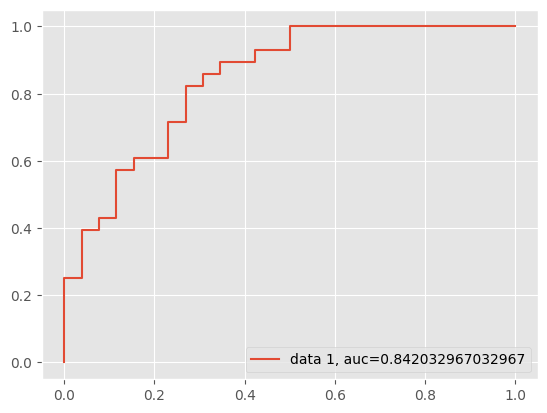

In [171]:
# curva ROC
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [172]:
# Creación del modelo utilizando matrices como en scikitlearn
# probar con variables cuantitativas
# X_train = sm.add_constant(X_train, prepend=True)
# modelo1 = sm.Logit(endog=y_train, exog=X_train)
# modelo1 = modelo1.fit()
# print(modelo1.summary())

## Predicting a new result

In [174]:
# nuevos valores
# X_new = pd.DataFrame({'Age': [70], 'sex': [1], 'cp': [130], 'trestbps': [322],'Chol': [0], 'fbs': [2], 'EKG': [109],
#                      'thalach': [0], 'exang': [2.4], 'oldpeak': [2], 'Slope': [3], 'ca': [3], 'Thal': [1]})
# modelo.predict_proba(X_new)

# print(modelo.predict(sc.transform([[30,87000]])))

Revisar esta pagina

https://deepnote.com/app/mazzaroli/Regresion-Logistica-con-Python-y-scikit-learn-cd6b9628-59c3-4496-8abc-8beb77d9b4ff